<a href="https://colab.research.google.com/github/jhmuller/LendinClub/blob/master/first_submission_on_Numerai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making your first submission on Numerai

## Introduction 
This tutorial will go over how to create your first submission on Numerai.

## Overview

1. Using this notebook
2. Download the datasets
3. Train your first model
4. Generate your first predictions
4. Make your first submission


---



## 1. Using this notebook 

This is an interactive notebook. You can execute code in each cell by pressing `shift+enter`. This requires you to login with your Google account.

In order to make changes, you need to make a copy by `File -> Save a copy in Drive`.

Let's start off by installing and importing our dependencies.

In [1]:
# install dependencies
!pip install pandas sklearn numerapi

In [2]:
# import dependencies
import pandas as pd
import numerapi
import sklearn.linear_model

## 2. Download the datasets

### Datasets 
*   `training_data` is used to train your model
*   `tournament_data` is used to evaluate your model

### Column descriptions
*   id: a randomized id that corresponds to a stock 
*   era: a period of time
*   data_type: either `train`, `validation`, `test`, or `live` 
*   feature_*: abstract financial features of the stock 
*   target_kazutsugi: abstract measure of stock performance




In [3]:
# download the latest training dataset (takes around 30s)
training_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_training_data.csv.xz")
training_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,0.25,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [4]:
# download the latest tournament dataset (takes around 30s)
tournament_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_tournament_data.csv.xz")
tournament_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
0,n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,0.25,0.0,0.25,0.50,0.25,0.00,0.25,1.00,1.00,0.25,1.00,1.00,0.25,0.25,0.0,0.50,0.25,0.75,0.00,0.50,0.25,0.25,0.25,0.50,0.00,0.50,1.00,...,0.00,0.0,0.25,0.5,0.25,0.25,0.00,0.25,0.00,0.25,0.50,0.50,0.50,0.50,0.00,0.25,0.75,0.25,0.25,0.50,0.25,0.00,0.25,0.50,0.25,0.5,0.25,0.25,1.00,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00,0.00
1,n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,0.75,0.5,0.00,0.25,0.50,0.00,1.00,0.25,0.25,1.00,1.00,0.25,0.75,0.00,0.0,0.75,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.25,0.00,1.00,...,0.50,0.5,0.25,1.0,0.50,0.25,0.00,0.25,0.50,0.25,1.00,0.25,0.00,0.50,0.75,0.75,0.50,1.00,1.00,0.25,0.50,0.25,0.50,0.50,0.50,0.5,0.25,0.25,0.75,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50,0.25
2,n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,1.00,1.0,1.00,0.75,0.50,0.50,1.00,1.00,0.50,0.50,0.00,1.00,0.50,1.00,0.5,1.00,0.50,1.00,0.25,1.00,1.00,1.00,0.50,1.00,1.00,0.75,1.00,...,0.25,0.5,0.00,0.0,0.00,0.25,0.25,0.00,0.50,0.00,0.00,0.00,0.25,0.00,0.25,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.75,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00,1.00
3,n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,0.75,0.0,0.50,0.00,0.50,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.25,0.75,1.0,0.50,0.50,0.75,0.50,1.00,0.50,0.25,0.75,0.25,0.75,0.25,0.75,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.25,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25,0.75
4,n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,0.50,1.0,1.00,1.00,1.00,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.00,0.25,0.0,0.00,0.75,0.25,1.00,0.25,1.00,0.75,0.00,1.00,0.75,0.75,0.75,...,0.00,0.5,0.50,0.0,0.75,0.50,0.75,0.25,0.25,0.25,0.00,0.25,0.50,0.25,1.00,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.75,1.00,1.0,0.75,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00,1.00


## 3. Train your first model
Let's create a basic model using sklearn's linear regression.

In [12]:
# find only the feature columns
import re
feature_cols = training_data.columns[training_data.columns.str.startswith('feature')]
data_cols =  [c for c in training_data.columns if re.match(r'feature|target', c)]

In [13]:
training_data[data_cols].corr()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
feature_intelligence1,1.000000,-0.014157,-0.024404,0.652596,0.069868,0.151265,0.188467,0.760617,-0.017661,-0.029344,0.702405,0.088738,-0.003272,-0.032363,0.004726,-0.030649,0.000292,-0.012550,-0.047084,0.008299,0.022580,-0.001011,-0.045528,-0.016977,0.011022,-0.030916,0.005139,0.022873,0.015390,0.039756,-0.021626,-0.030812,-0.093414,0.010475,-0.035210,-0.040386,0.013061,0.042140,-0.032178,-0.074060,...,-0.006912,0.060504,-0.298550,0.021838,-0.161228,-0.316550,-0.275020,-0.130616,-0.043984,-0.259740,-0.078508,-0.291573,-0.289194,-0.115020,0.045394,-0.026179,0.041073,-0.061749,0.026049,-0.156397,-0.104341,-0.254610,-0.078115,-0.057316,-0.010024,0.065157,-0.258634,-0.261610,0.002025,-0.086291,-0.088465,-0.061247,-0.120785,-0.120960,0.021476,0.037546,-0.125501,-0.032981,-0.168257,0.001904
feature_intelligence2,-0.014157,1.000000,0.905315,-0.028097,0.184372,-0.048150,-0.031199,-0.014185,0.483491,0.465704,-0.012449,0.187531,0.014311,0.180983,0.094257,0.130294,0.046837,0.194874,0.115604,-0.140678,-0.047261,0.071522,0.160809,0.241104,0.150403,0.285044,-0.136765,0.314377,0.124779,0.357444,0.032169,0.162824,0.138518,0.129483,0.146406,0.192752,0.017980,0.291410,0.025775,0.118700,...,-0.102027,-0.121972,-0.014224,-0.166947,-0.127393,-0.024087,-0.081425,-0.062799,-0.055894,-0.038494,-0.113685,-0.032521,-0.088817,-0.151326,-0.127830,-0.101916,-0.225635,-0.104296,-0.132563,-0.040455,-0.150098,-0.022767,-0.075955,-0.124300,-0.073922,-0.203995,-0.082485,-0.086162,-0.182836,-0.135790,-0.127448,-0.141152,0.049052,-0.009823,-0.156142,-0.222864,0.025692,-0.044577,-0.109628,-0.007274
feature_intelligence3,-0.024404,0.905315,1.000000,-0.041086,0.173870,-0.053716,-0.027043,-0.027653,0.467432,0.503837,-0.014104,0.172922,0.010673,0.167666,0.100120,0.130832,0.044860,0.218077,0.133225,-0.138621,-0.049798,0.064416,0.155835,0.243386,0.144312,0.274441,-0.148724,0.304562,0.131461,0.342562,0.033331,0.153231,0.140740,0.144452,0.139745,0.196181,0.020746,0.309936,0.015359,0.133871,...,-0.094516,-0.117977,-0.017668,-0.163067,-0.108573,-0.014712,-0.076864,-0.068007,-0.058771,-0.039078,-0.100756,-0.036103,-0.080455,-0.137155,-0.134703,-0.102397,-0.217307,-0.092353,-0.114858,-0.033446,-0.150443,-0.028708,-0.063390,-0.116675,-0.090844,-0.214629,-0.076394,-0.079279,-0.161442,-0.119191,-0.105961,-0.134758,0.055136,0.001594,-0.152337,-0.232693,0.029589,-0.034833,-0.107264,-0.006729
feature_intelligence4,0.652596,-0.028097,-0.041086,1.000000,0.054492,0.103287,0.110541,0.815162,-0.030180,-0.043915,0.838094,0.089810,-0.013199,-0

In [20]:
# select those columns out of the training dataset
training_features = training_data[feature_cols]
training_data["target_kazutsugi"].mean()

0.5000024909925709

(501808, 314)


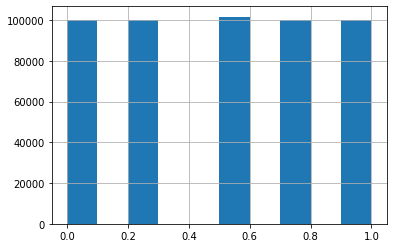

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
print(training_data.shape)
mpl.rcParams['agg.path.chunksize'] = 10000
#plt.plot(training_data["feature_wisdom46"], training_data["target_kazutsugi"])
x = training_data["target_kazutsugi"]
n, bins, patches = plt.hist(x) #, 2, density=1, facecolor='g', alpha=0.75)
#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.show()


In [17]:
# create a model and fit the training data (~30 sec to run)
ols_model = sklearn.linear_model.LinearRegression()
ols_model.fit(training_features, training_data.target_kazutsugi)
ols_model.intercept_

0.4650340904490189

In [16]:
# create a model and fit the training data (~30 sec to run)
#cv_model = sklearn.linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1])
#cv_model.fit(training_features, training_data.target_kazutsugi)

In [ ]:
X

Optimal alpha: 0.00178821
Optimal l1_ratio: 0.100
Number of iterations 78


In [18]:
#eln_model = sklearn.linear_model.ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
eln_model = sklearn.linear_model.ElasticNet(l1_ratio=0.5, alpha = 0.001,  fit_intercept=True, normalize = True)
eln_model.fit(training_features, training_data.target_kazutsugi)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
print(f"eln intercept= {eln_model.intercept_}")
eln_model.coef_

eln intercept= 0.5000024909925709


array([ 0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
       -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0

# New Section

In [ ]:
eln_model.coef_
ols_model.coef_
#training_features.corr()
ols_model.coef_
sum(eln_model.coef_> 0)
#eln_model.sparse_coef_

0

## 4. Generate your first predictions
Now that we have a trained model, we can use it to make predictions on the tournament data.



In [ ]:
# select the feature columns from the tournament data
live_features = tournament_data[feature_cols]

In [ ]:
# predict the target on the live features
predictions = model.predict(live_features)

In [ ]:
# predictions must have an `id` column and a `prediction_kazutsugi` column
predictions_df = tournament_data["id"].to_frame()
predictions_df["prediction_kazutsugi"] = predictions
predictions_df.head()

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.472981
1,n000920ed083903f,0.492854
2,n0038e640522c4a6,0.556868
3,n004ac94a87dc54b,0.496384
4,n0052fe97ea0c05f,0.497034


## 5. Make your first submission
To enter the tournament, we must submit the predictions back to Numerai. We will use the `numerapi` library to do this.

In [ ]:
# Get your API keys and model_id from https://numer.ai/submit
public_id = "REPLACEME"
secret_key = "REPLACEME"
model_id = "REPLACEME"
napi = numerapi.NumerAPI(public_id=public_id, secret_key=secret_key)

In [ ]:
# Upload your predictions
predictions_df.to_csv("predictions.csv", index=False)
submission_id = napi.upload_predictions("predictions.csv", model_id=model_id)

# Done 🚀
Good job! You just made your first submission on Numerai!

Head back over to https://numer.ai/submit to continue.